#1. File Upload

In [1]:
from google.colab import files
upload_file = files.upload()

Saving car1.jpg to car1.jpg


#2. Load File

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [3]:
print("OpenCV version: ", cv2.__version__)

OpenCV version:  4.1.2


In [4]:
!ls -al

total 96
drwxr-xr-x 1 root root  4096 Mar  8 07:11 .
drwxr-xr-x 1 root root  4096 Mar  8 07:04 ..
-rw-r--r-- 1 root root 77963 Mar  8 07:11 car1.jpg
drwxr-xr-x 4 root root  4096 Mar  1 14:35 .config
drwxr-xr-x 1 root root  4096 Mar  1 14:35 sample_data


In [5]:
img = cv2.imread('car1.jpg')

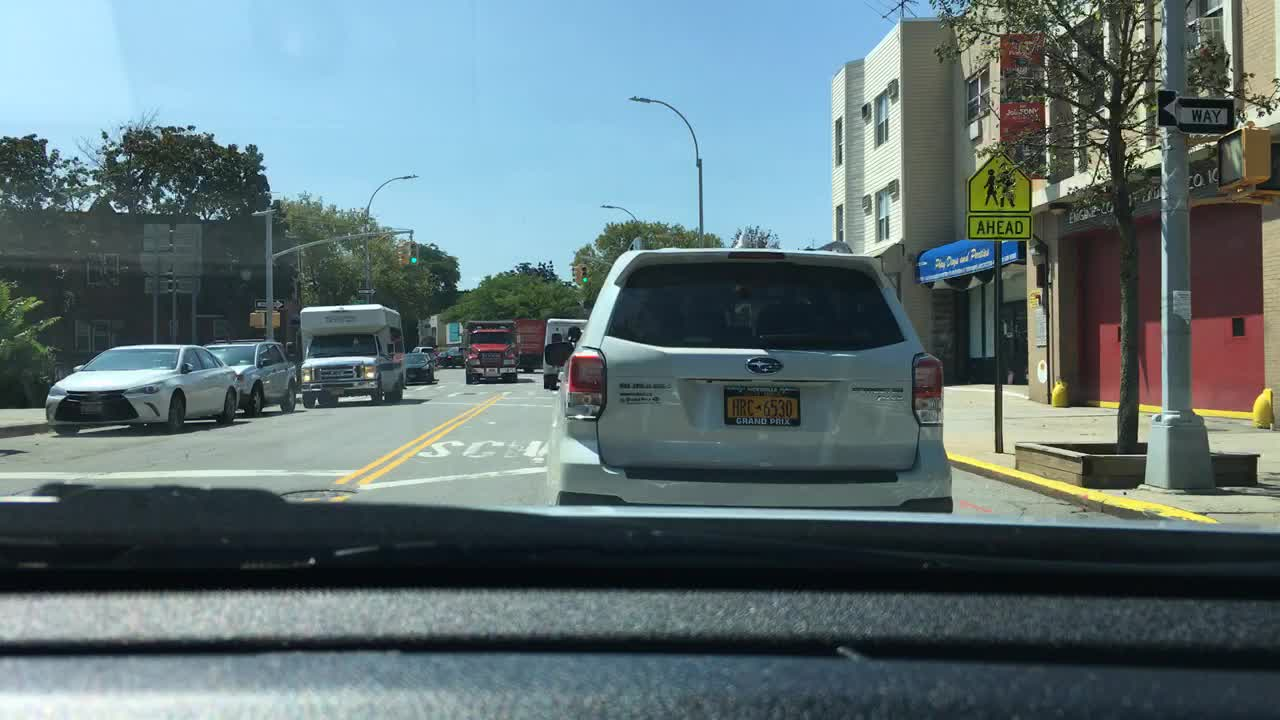

width: 1280 pixels
heigh: 720 pixels
channels: 3
720 1280 (640, 360)


In [6]:
cv2_imshow(img)

print("width: {} pixels".format(img.shape[1]))
print("heigh: {} pixels".format(img.shape[0]))
print("channels: {}".format(img.shape[2]))

(height, width) = img.shape[:2]
center = (width // 2, height // 2)

print(height, width, center)

In [7]:
X = 125 #@param {type:"slider", min:0, max:1280, step:1}
Y = 111 #@param {type:"slider", min:0, max:720, step:1}
SIZE = 125 #@param {type:"slider", min:0, max:1280, step:1}

In [8]:
(b,g,r) = img[X, Y]
print("Pixel at ({}, {}) - Red: {}, Green: {}, Blue: {}".format(X, Y, r, g, b))

Pixel at (125, 111) - Red: 165, Green: 213, Blue: 235


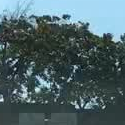

In [9]:
# Crop cordination = image[y: y+h, x:x+w]
croped = img[Y:Y+SIZE, X:X+SIZE]
cv2_imshow(croped)

In [10]:
background = np.full((height, width, 3), 255, np.uint8)

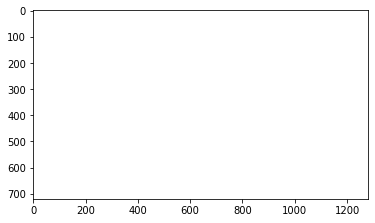

In [11]:
plt.imshow(background)

In [12]:
img[Y:Y+SIZE, X:X+SIZE] = (0, 0, 255)
background[Y:Y+SIZE, X:X+SIZE] = (0, 0, 255)

In [ ]:
cv2.rectangle(img, (X+SIZE*2, Y), (X+SIZE*3, Y+SIZE), (0,255, 0), 5)
cv2.rectangle(background, (X+SIZE*2, Y), (X+SIZE*3, Y+SIZE), (0,255, 0), 5)

In [ ]:
radius = int(SIZE/2)
cv2.circle(img, (X+SIZE*4, Y+radius), radius, (255,255, 0), -1)
cv2.circle(background, (X+SIZE*4, Y+radius), radius, (255,255, 0), -1)

In [ ]:
cv2.line(img, (X+SIZE*5, Y), (X+SIZE*6, Y+SIZE), (0, 255, 255), 5)
cv2.line(background, (X+SIZE*5, Y), (X+SIZE*6, Y+SIZE), (0, 255, 255), 5)

In [ ]:
cv2.putText(img, 'creApple', (X+SIZE*7, Y+SIZE), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 0, 0))
cv2.putText(background, 'creApple', (X+SIZE*7, Y+SIZE), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 0, 0))

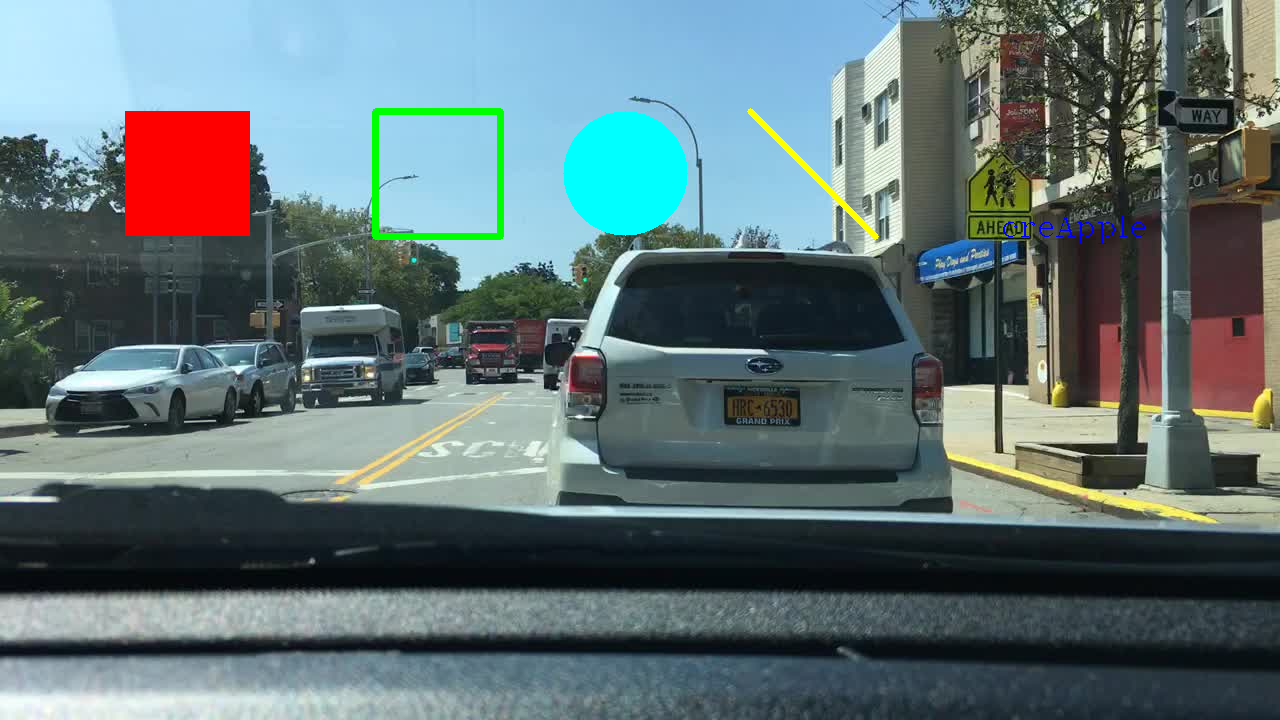

In [17]:
cv2_imshow(img)

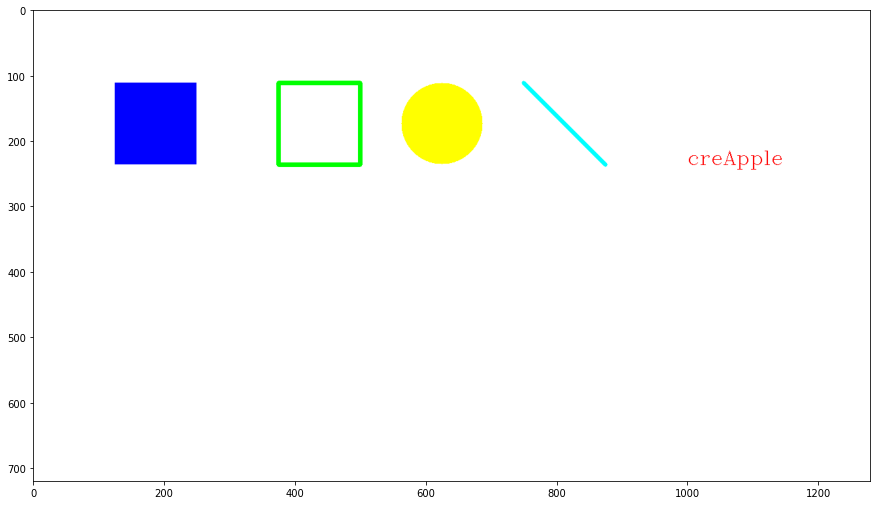

In [18]:
plt.figure(figsize=(15, 15))
plt.imshow(background)

In [19]:
cv2.imwrite('car-copy.jpg', img)

True

In [20]:
cv2.imwrite('plt-copy.jpg', background)

True

In [21]:
!ls -al

total 308
drwxr-xr-x 1 root root   4096 Mar  8 07:14 .
drwxr-xr-x 1 root root   4096 Mar  8 07:04 ..
-rw-r--r-- 1 root root  77963 Mar  8 07:11 car1.jpg
-rw-r--r-- 1 root root 181260 Mar  8 07:14 car-copy.jpg
drwxr-xr-x 4 root root   4096 Mar  1 14:35 .config
-rw-r--r-- 1 root root  30922 Mar  8 07:14 plt-copy.jpg
drwxr-xr-x 1 root root   4096 Mar  1 14:35 sample_data


In [22]:
def download(path):
    try:
        from google.colab import files
        files.download(path)
    except ImportError:
        import os
        print('Error download: ', os.path.join(os, getcwd(), path))

In [23]:
download('plt-copy.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

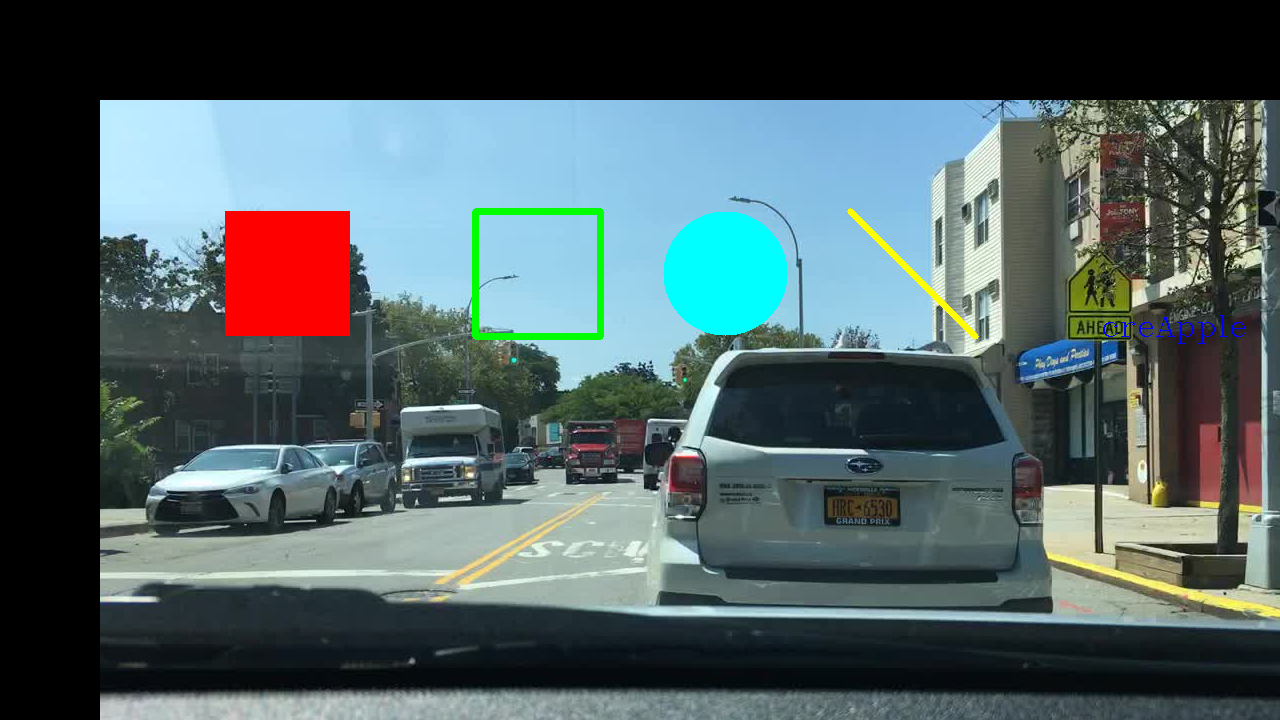

In [24]:
# Moved down: +, up: - and right: +, left - 
move = np.float32([[1, 0, 100], [0, 1, 100]])
moved = cv2.warpAffine(img, move, (width, height))
cv2_imshow(moved)

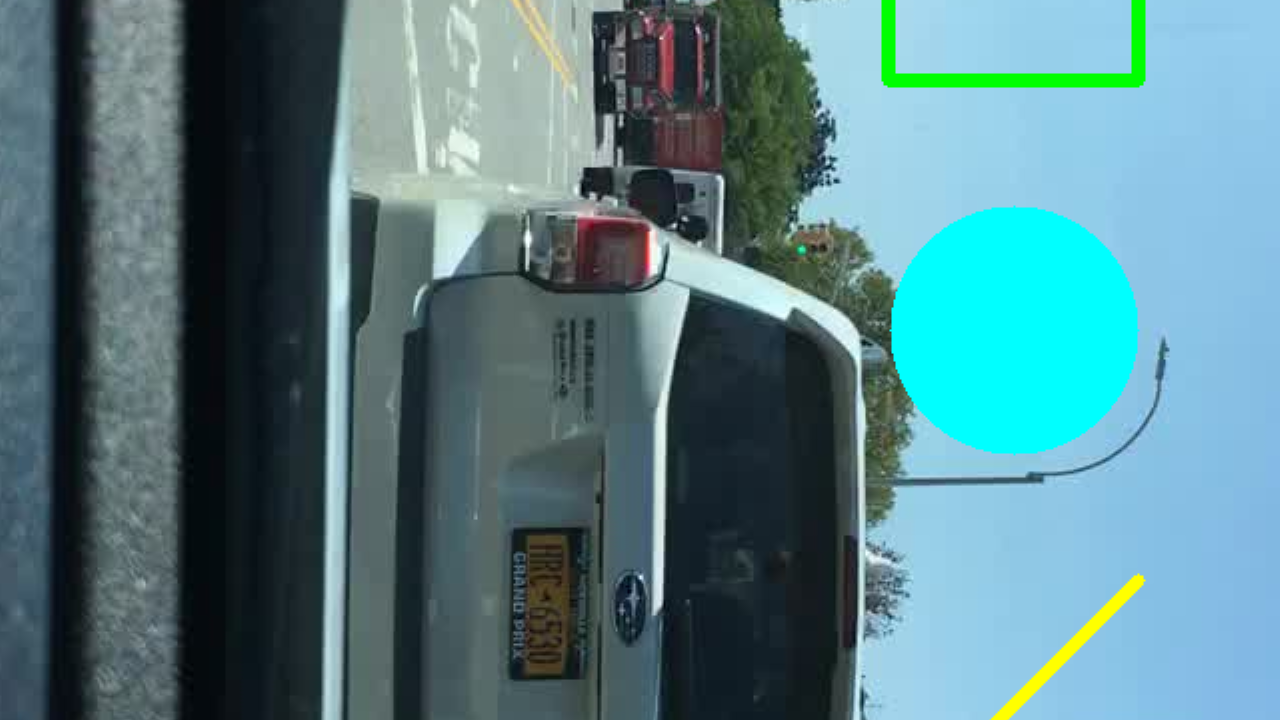

In [25]:
rotate = cv2.getRotationMatrix2D(center, 270, 2.0)
rotated = cv2. warpAffine(img, rotate, (width, height))
cv2_imshow(rotated)

In [26]:
ratio = SIZE / width
dimension = (SIZE, int(height*ratio))

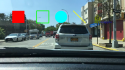

In [27]:
resized = cv2.resize(img, dimension, interpolation=cv2.INTER_AREA)
cv2_imshow(resized)

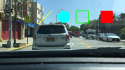

In [28]:
#Flipped Horizontal 1, Vertical 0, both -1 
flipped = cv2.flip(resized, 1)
cv2_imshow(flipped)

# Mask

In [29]:
# White background = np.full((height, width, 3), 255, np.uint8)
mask = np.zeros(img.shape[:2], dtype='uint8')

In [30]:
cv2.circle(mask, center, int(height/2), (255, 255, 255), -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

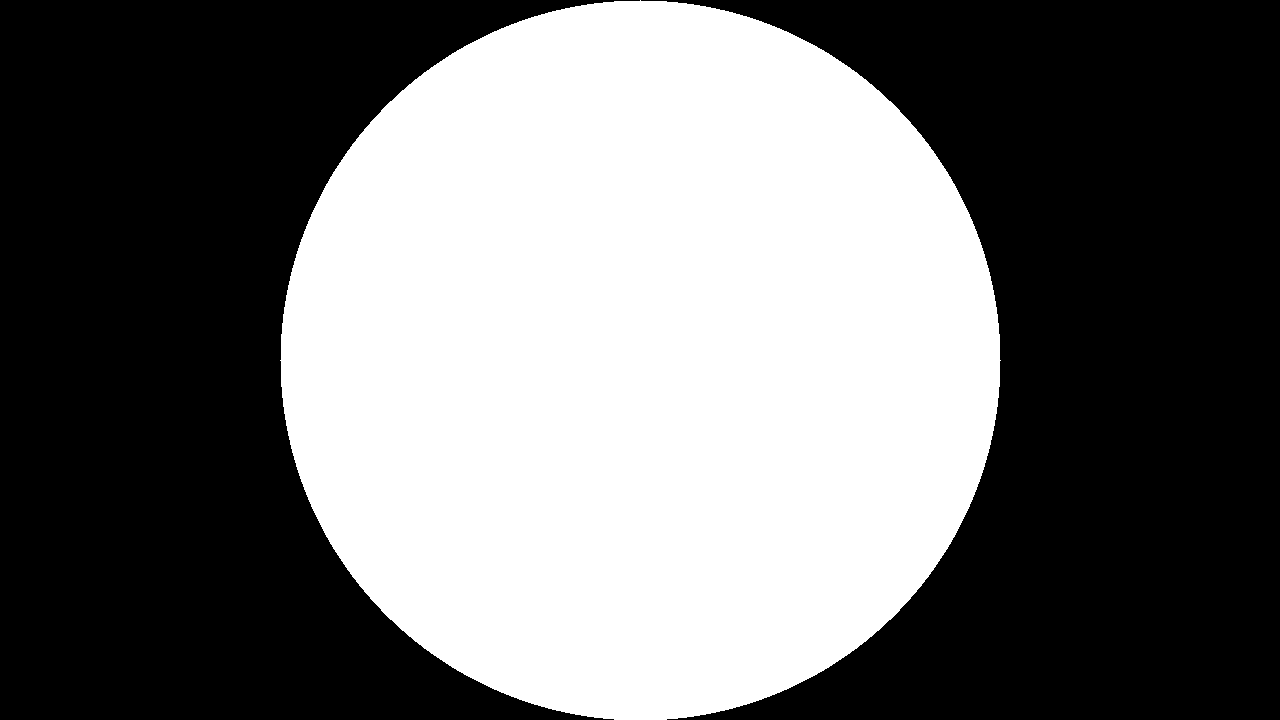

In [31]:
cv2_imshow(mask)

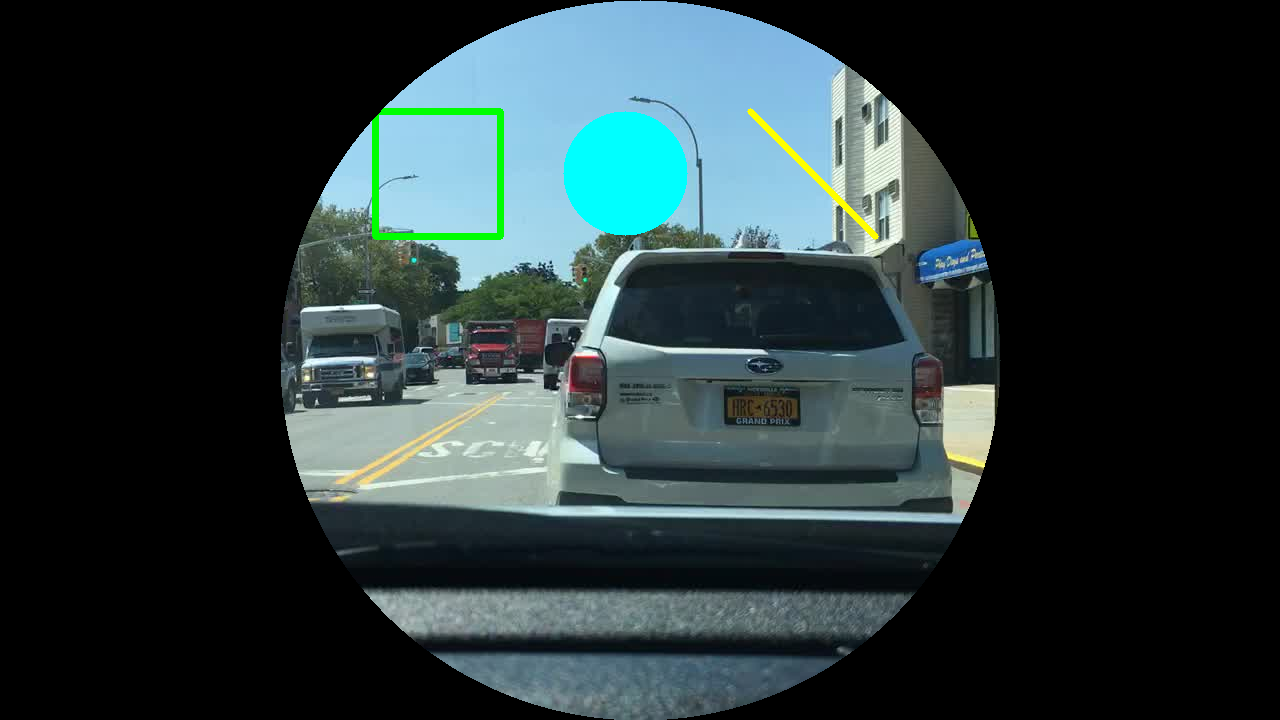

In [32]:
masked = cv2.bitwise_and(img, img, mask=mask)
cv2_imshow(masked)

# Filter

In [33]:
zeros = np.zeros(img.shape[:2], np.uint8)

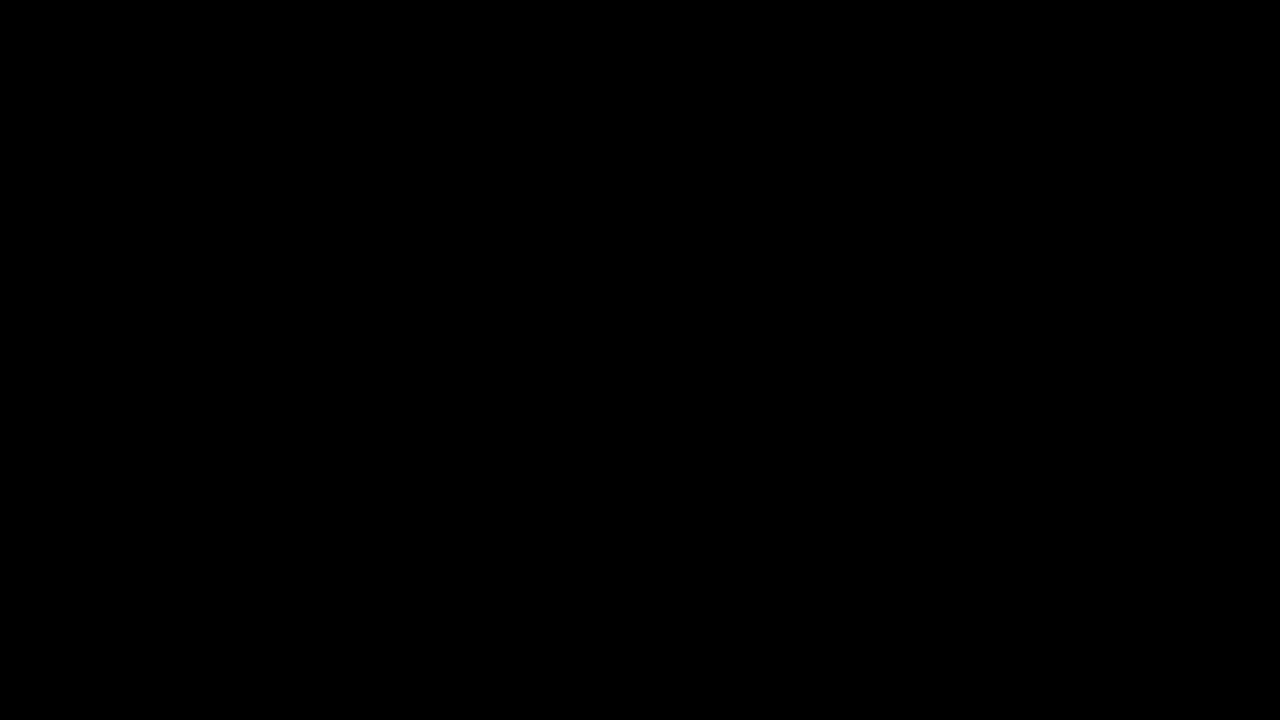

In [45]:
cv2_imshow(zeros)

In [35]:
(Blue, Green, Red) = cv2.split(img)

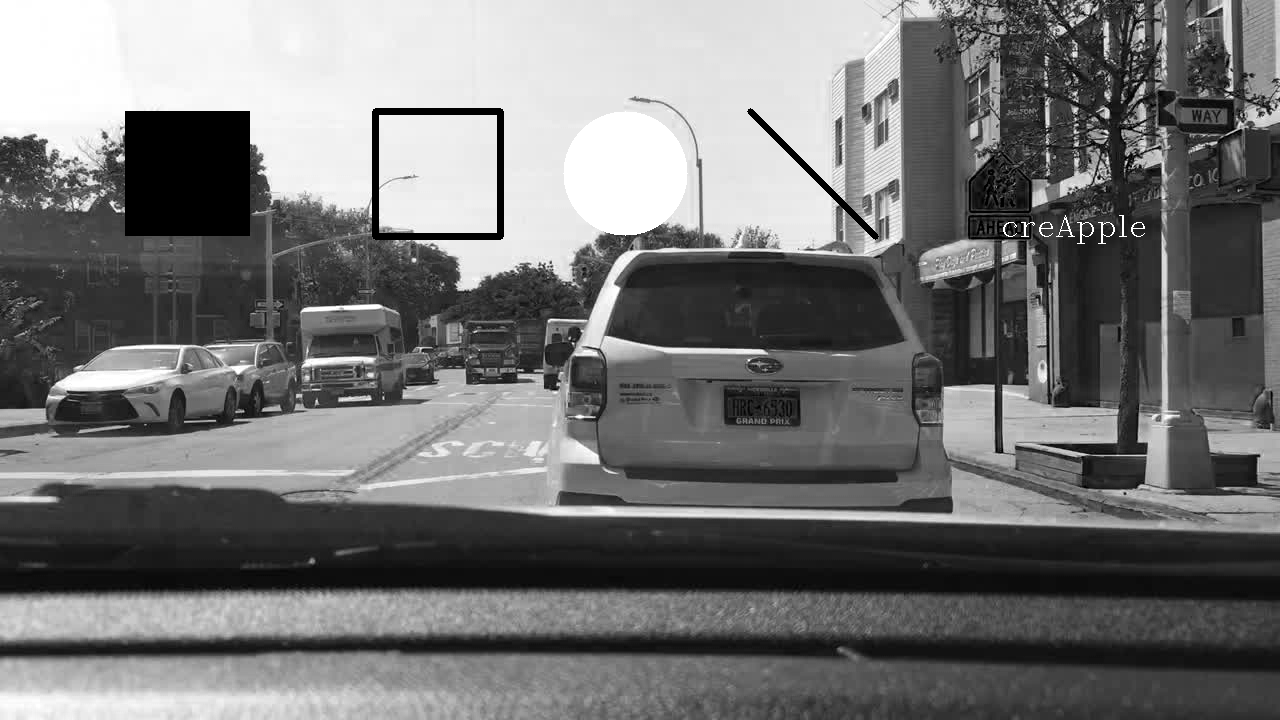

In [36]:
cv2_imshow(Blue)

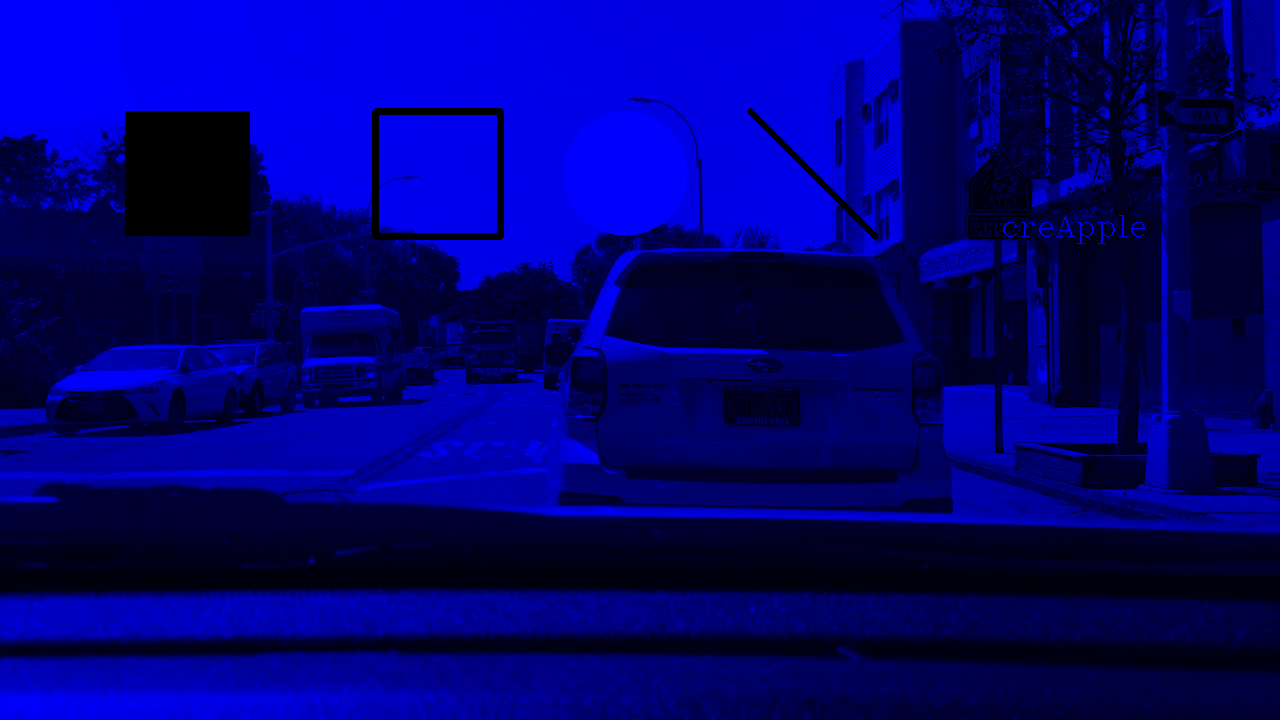

In [37]:
cv2_imshow(cv2.merge([Blue, zeros, zeros]))

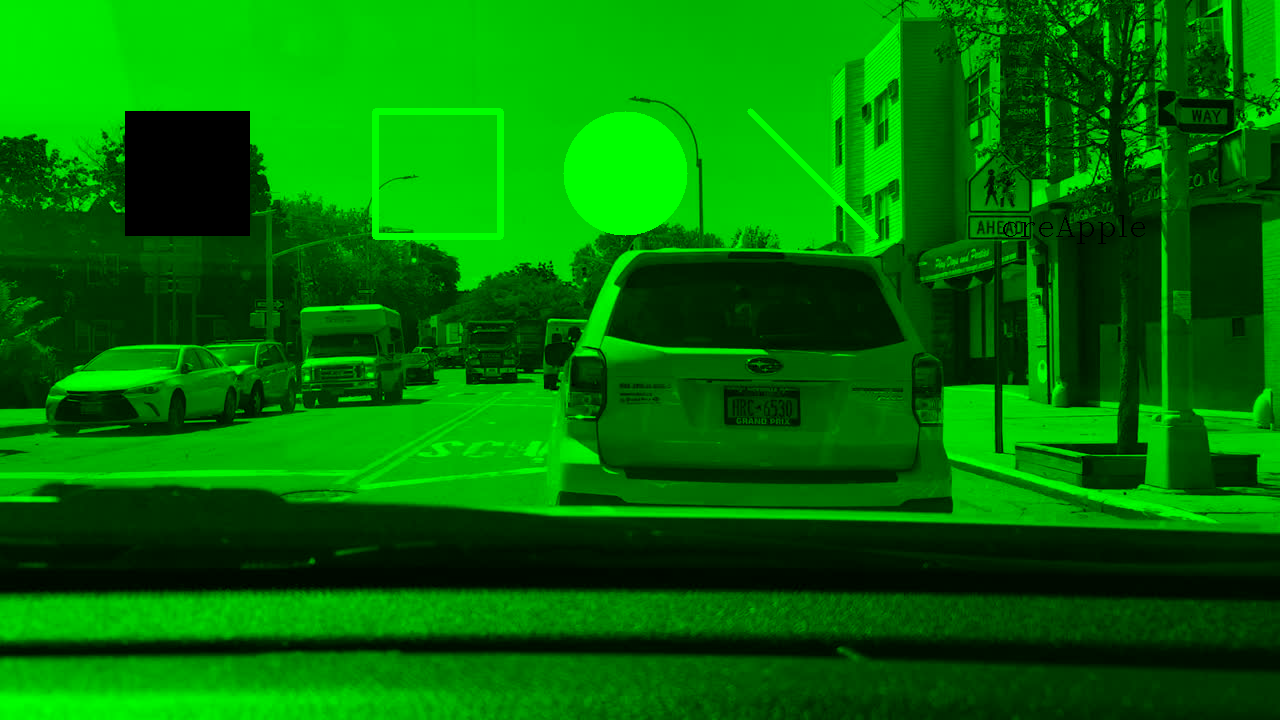

In [38]:
cv2_imshow(cv2.merge([zeros, Green, zeros]))

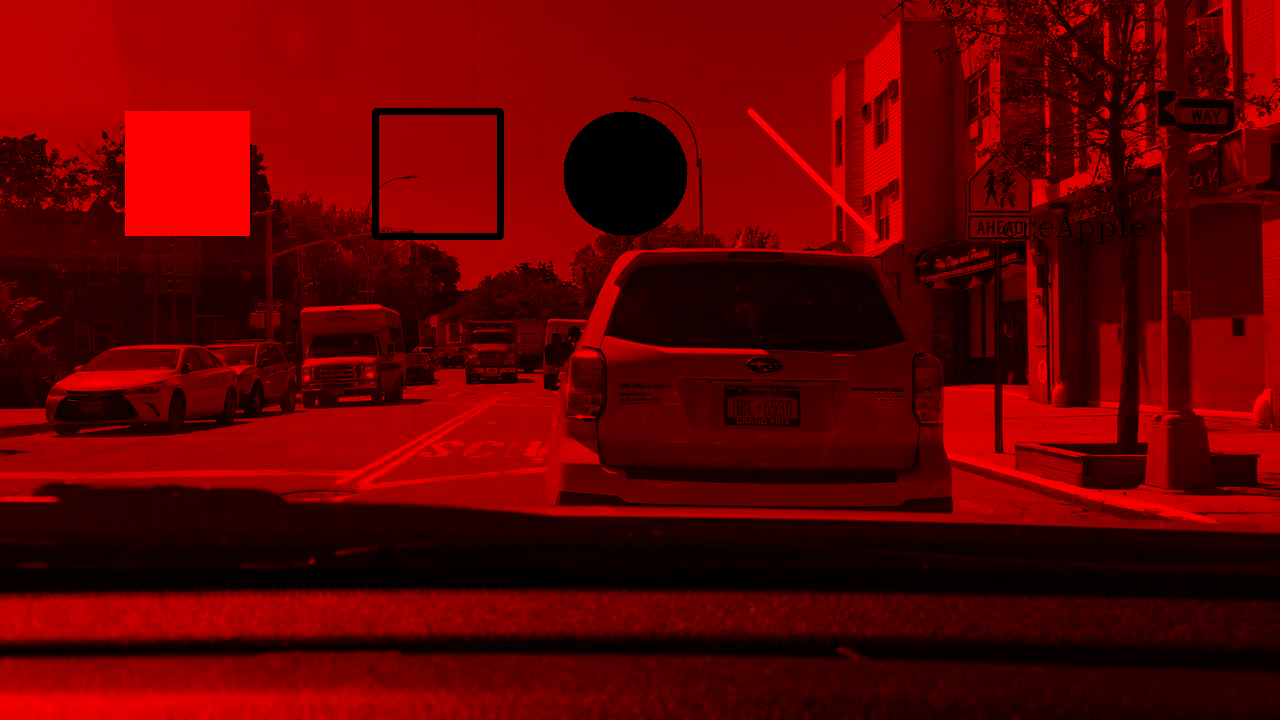

In [39]:
cv2_imshow(cv2.merge([zeros, zeros, Red]))

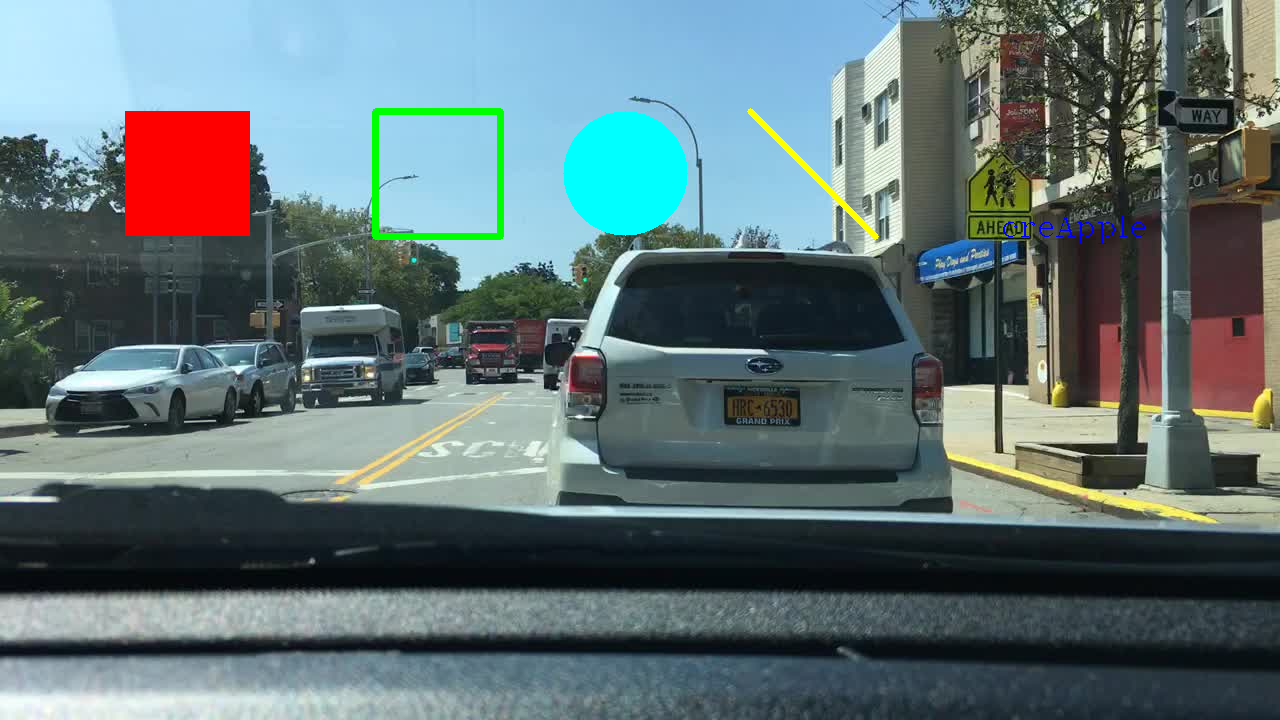

In [40]:
cv2_imshow(cv2.merge([Blue, Green, Red]))

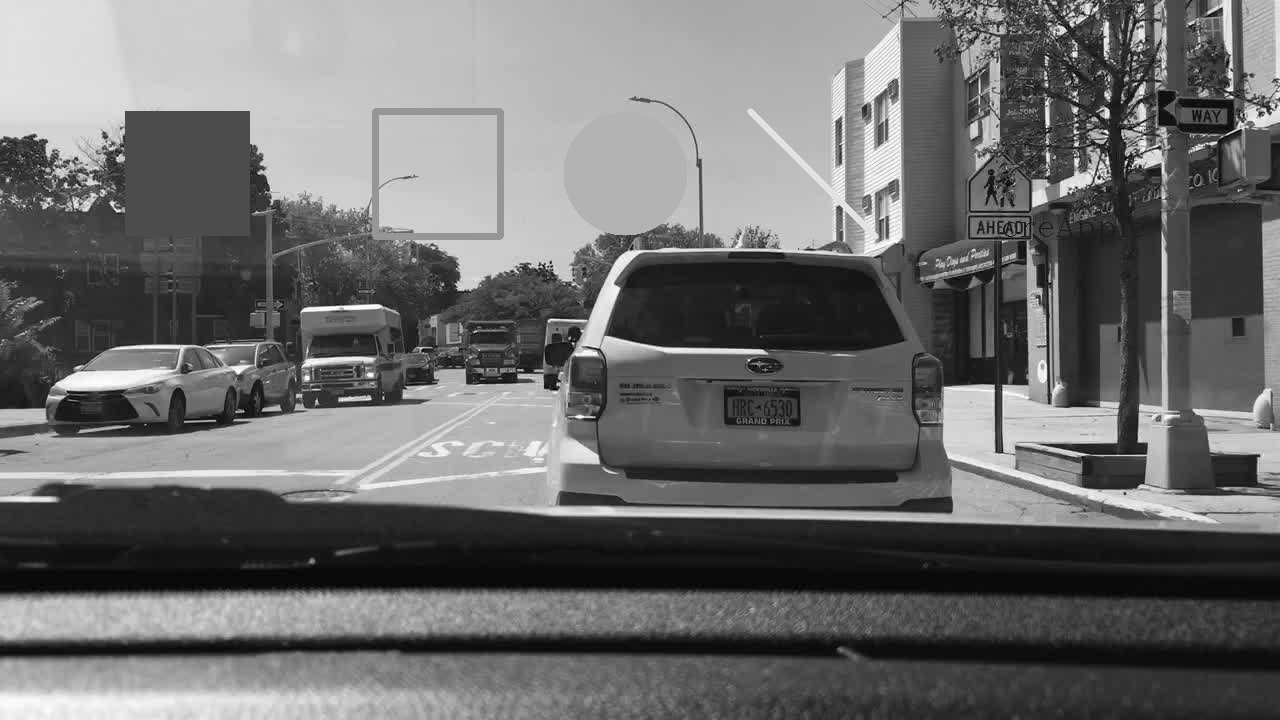

In [41]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [ ]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2_imshow(hsv)

In [ ]:
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
cv2_imshow(lab)

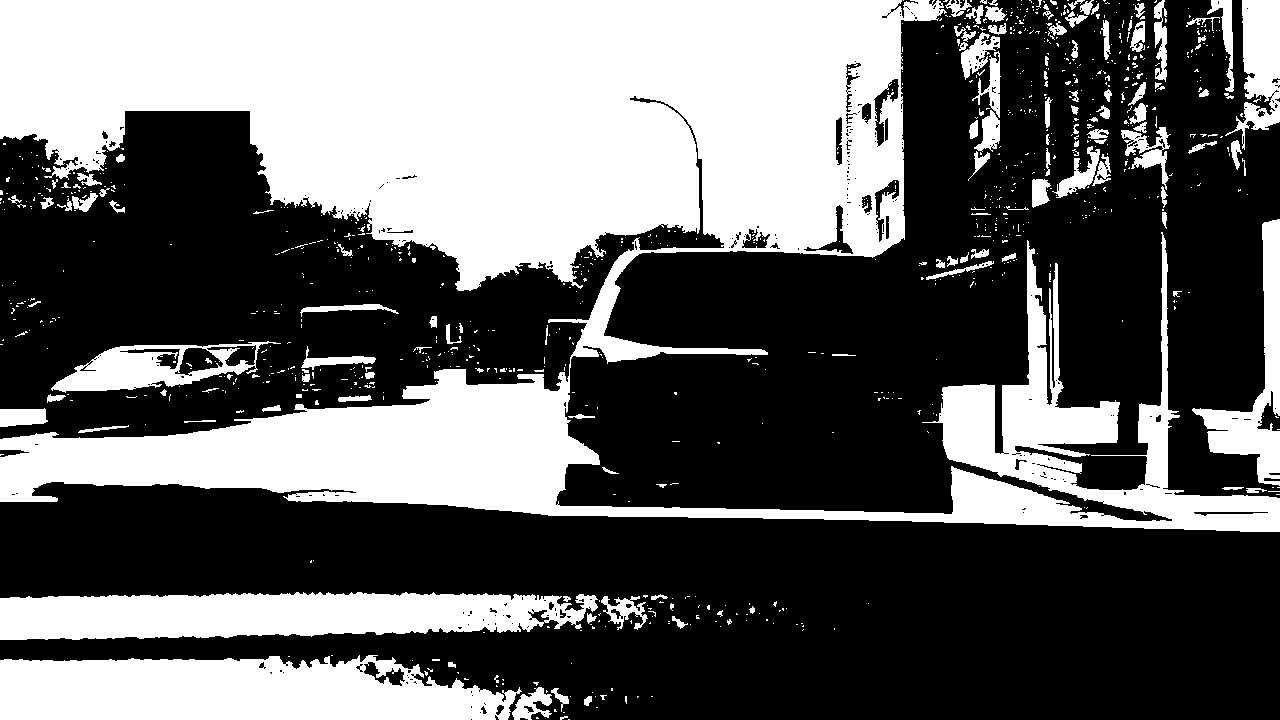

In [44]:
ret, thresh = cv2.threshold(gray, 127, 255, 0)
cv2_imshow(thresh)

10


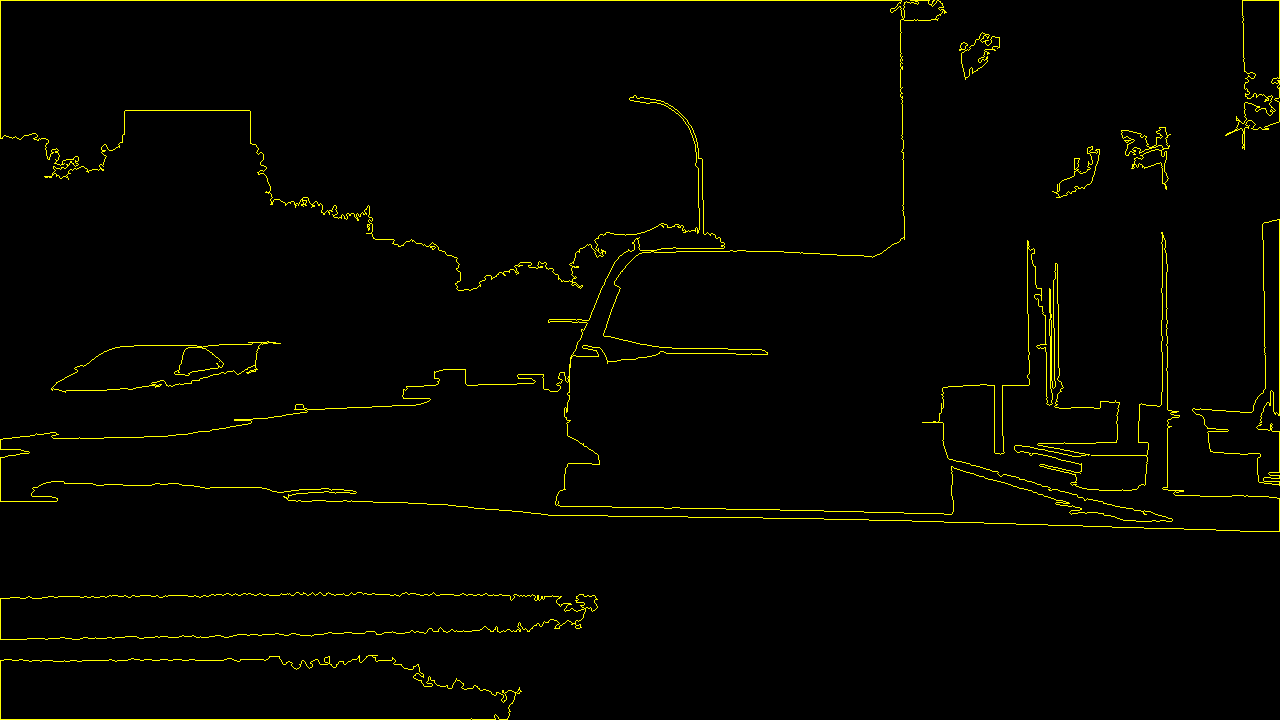

In [59]:
contours, hierachy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]
print(len(contours))
back = np.zeros((height, width, 3), np.uint8)
for i in range(len(coutours)):
    cv2.drawContours(back, contours, i, (0, 255, 255))
cv2_imshow(back)

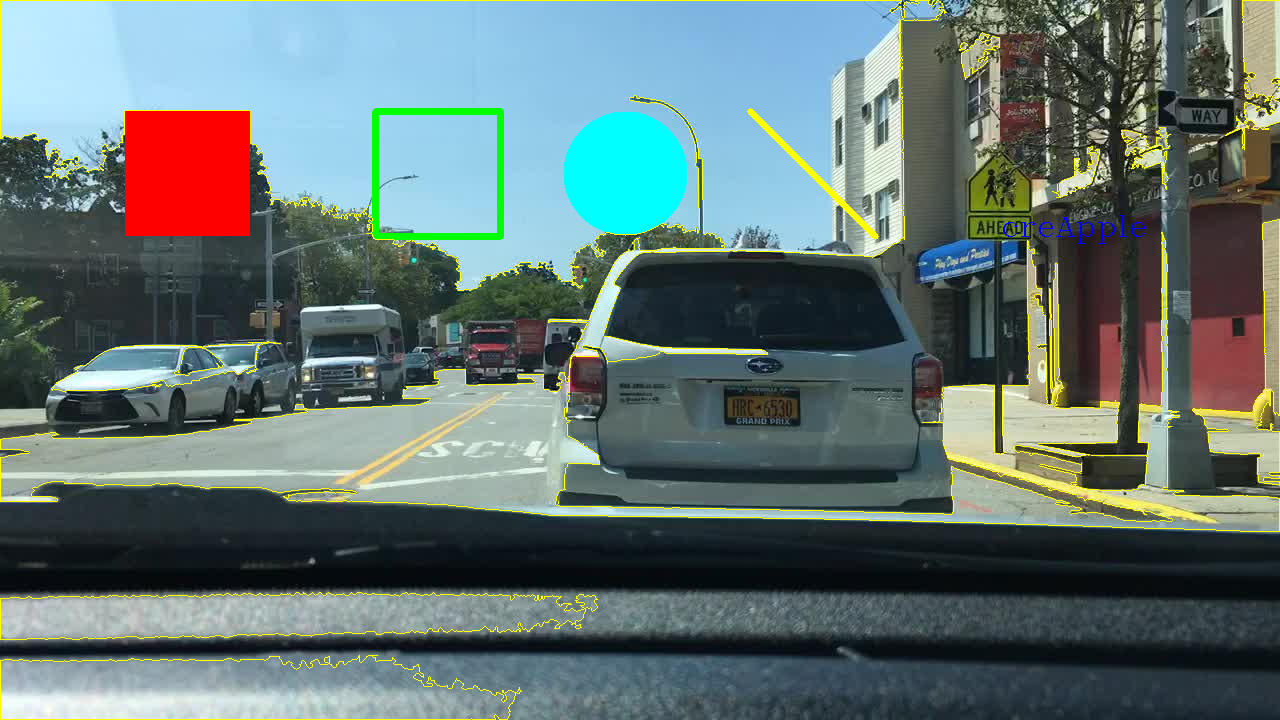

In [60]:
for i in range(len(coutours)):
    cv2.drawContours(img, contours, i, (0, 255, 255))
cv2_imshow(img)